In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d theblackmamba31/landscape-image-colorization/

 94% 180M/192M [00:01<00:00, 157MB/s]
100% 192M/192M [00:01<00:00, 164MB/s]


In [ ]:
! unzip landscape-image-colorization

Streaming output truncated to the last 5000 lines.
  inflating: landscape Images/gray/2914.jpg  
  inflating: landscape Images/gray/2915.jpg  
  inflating: landscape Images/gray/2916.jpg  
  inflating: landscape Images/gray/2917.jpg  
  inflating: landscape Images/gray/2918.jpg  
  inflating: landscape Images/gray/2919.jpg  
  inflating: landscape Images/gray/292.jpg  
  inflating: landscape Images/gray/2920.jpg  
  inflating: landscape Images/gray/2921.jpg  
  inflating: landscape Images/gray/2922.jpg  
  inflating: landscape Images/gray/2923.jpg  
  inflating: landscape Images/gray/2924.jpg  
  inflating: landscape Images/gray/2925.jpg  
  inflating: landscape Images/gray/2926.jpg  
  inflating: landscape Images/gray/2927.jpg  
  inflating: landscape Images/gray/2928.jpg  
  inflating: landscape Images/gray/2929.jpg  
  inflating: landscape Images/gray/293.jpg  
  inflating: landscape Images/gray/2930.jpg  
  inflating: landscape Images/gray/2931.jpg  
  inflating: landscape Images/g

LAB

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers, losses
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
path = '/content/drive/MyDrive/landscape Images/color data'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   rotation_range=25,
                                   brightness_range=[0.2,1.2])

In [ ]:
train = train_datagen.flow_from_directory(path, target_size=(160,160),batch_size=7000,class_mode=None)

Found 7129 images belonging to 1 classes.


In [ ]:
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
import numpy as np
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128)
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(7000, 160, 160, 1)
(7000, 160, 160, 2)


In [ ]:
def Colorizer(input_shape):
  encoder_input = keras.Input(shape=input_shape)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(encoder_input)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=1)(x)   
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(x)
  x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(256, (5, 5), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(x)
    
  encoder_output =  layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(x)

  x = layers.UpSampling2D((2, 2))(encoder_output)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.UpSampling2D((2, 2))(encoder_output)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(2, (3, 3), activation='tanh', padding='same', strides=1)(x)
  decoder_output = layers.UpSampling2D((2, 2))(x)
  return keras.Model(encoder_input, decoder_output, name="decoder")

colorizer = Colorizer((160,160,1))

In [ ]:
colorizer.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 256)       295168    
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 256)       1638

In [ ]:
import tensorflow as tf
def loss(y_true,y_pred) :
    l = tf.sqrt(tf.reduce_mean(tf.square(tf.abs(y_true - y_pred))))
    return l

In [ ]:
colorizer.compile(optimizer='adam', loss=loss , metrics=['accuracy','mae','mse'])
hist=colorizer.fit(X,Y,validation_split=0.2, epochs=20)

Epoch 1/20
175/175 [==============================] - 76s 342ms/step - loss: 0.0885 - accuracy: 0.5948 - mae: 0.0563 - mse: 0.0096 - val_loss: 0.0841 - val_accuracy: 0.6410 - val_mae: 0.0527 - val_mse: 0.0072
Epoch 2/20
175/175 [==============================] - 57s 327ms/step - loss: 0.0796 - accuracy: 0.6529 - mae: 0.0506 - mse: 0.0065 - val_loss: 0.0824 - val_accuracy: 0.6500 - val_mae: 0.0516 - val_mse: 0.0069
Epoch 3/20
175/175 [==============================] - 57s 327ms/step - loss: 0.0785 - accuracy: 0.6532 - mae: 0.0500 - mse: 0.0063 - val_loss: 0.0802 - val_accuracy: 0.6641 - val_mae: 0.0513 - val_mse: 0.0065
Epoch 4/20
175/175 [==============================] - 57s 327ms/step - loss: 0.0780 - accuracy: 0.6565 - mae: 0.0497 - mse: 0.0062 - val_loss: 0.0796 - val_accuracy: 0.6563 - val_mae: 0.0512 - val_mse: 0.0064
Epoch 5/20
175/175 [==============================] - 57s 327ms/step - loss: 0.0767 - accuracy: 0.6628 - mae: 0.0489 - mse: 0.0060 - val_loss: 0.0795 - val_accuracy

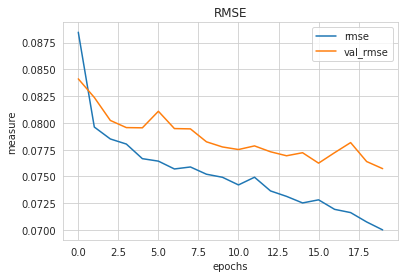

In [ ]:
import matplotlib.pyplot as plt
ax = plt.subplot(label= True)
plt.plot(hist.history["loss"], label = "loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.title("RMSE")
plt.xlabel("epochs")
plt.ylabel("measure")
plt.legend(["rmse", "val_rmse"])

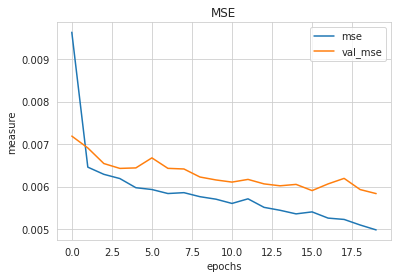

In [ ]:
import matplotlib.pyplot as plt
ax = plt.subplot(label= True)
plt.plot(hist.history["mse"], label = "mse")
plt.plot(hist.history["val_mse"], label = "val_mse")
plt.title("MSE")
plt.xlabel("epochs")
plt.ylabel("measure")
plt.legend(["mse", "val_mse"])

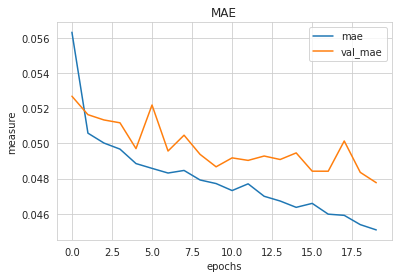

In [ ]:
import matplotlib.pyplot as plt
ax = plt.subplot(label= True)
plt.plot(hist.history["mae"], label = "mae")
plt.plot(hist.history["val_mae"], label = "val_mae")
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("measure")
plt.legend(["mae", "val_mae"])

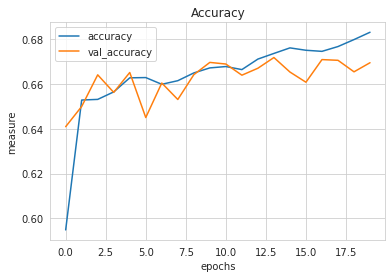

In [ ]:
ax = plt.subplot(label= True)
plt.plot(hist.history["accuracy"], label = "accuracy")
plt.plot(hist.history["val_accuracy"], label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("measure")
plt.legend(["accuracy", "val_accuracy"])

In [ ]:
# train_pred = model.predict(train_inp)
# test_pred = model.predict(test_inp)
# train_random=random.randint(1,trainsize)
# test_random=random.randint(1,testsize)
# check=np.interp(train_pred, (train_pred.min(), train_pred.
# max()), (0,255))
# check1=np.interp(test_pred, (test_pred.min(), test_pred.max()),
# (0,255))
# l_channel=test_inp[20]*255
# a_channel=check1[20,:,:,0]
# b_channel=check1[20,:,:,1]
# transfer = cv2.merge([l_channel, a_channel, b_channel])
# transfer = cv2.cvtColor(transfer.astype("uint8"),
# cv2.COLOR_LAB2BGR)

(1, 160, 160, 1)


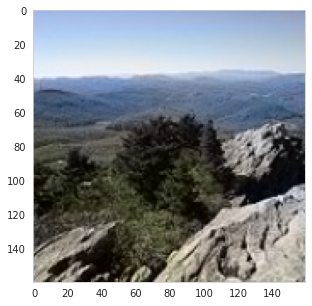

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/gray data/gray/6001.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


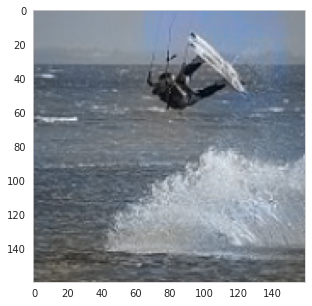

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/gray data/gray/64.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


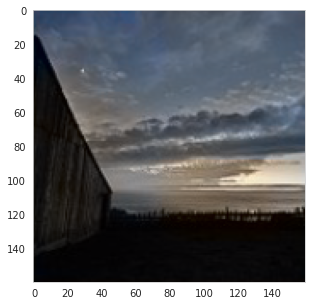

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/gray data/gray/320.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


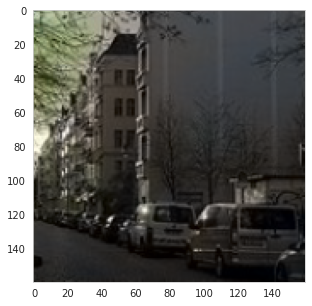

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/gray data/gray/0.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


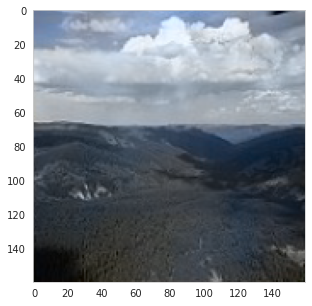

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/gray data/gray/448.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


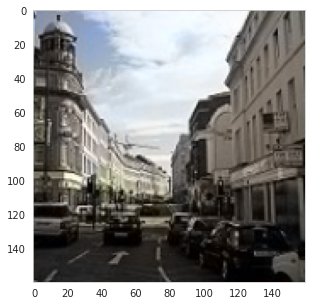

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/gray data/gray/640.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


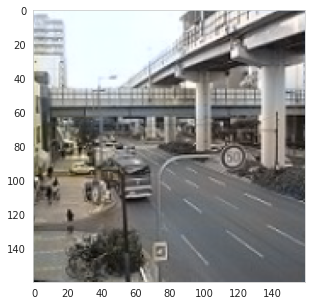

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/gray data/gray/100.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


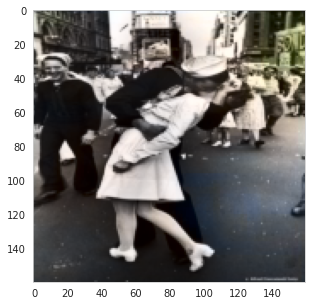

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/ww2_victory.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


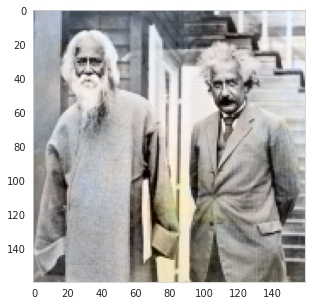

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/tagore_einstein.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


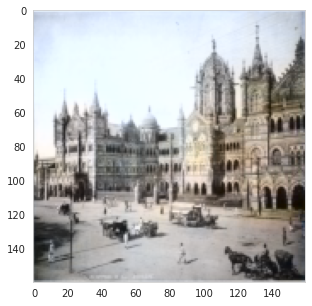

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/cst_mumbai.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


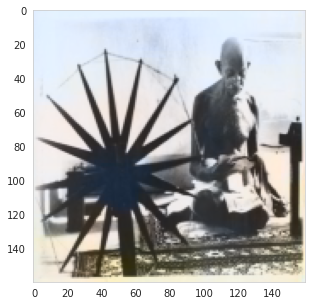

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/gandhi.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


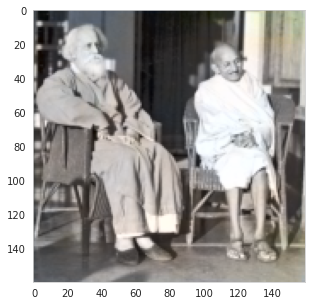

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/tagore_gandhi.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


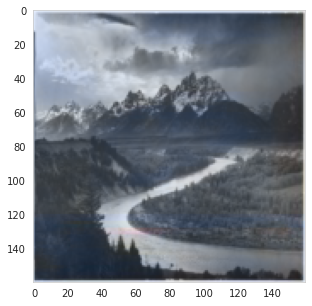

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/land1.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

(1, 160, 160, 1)


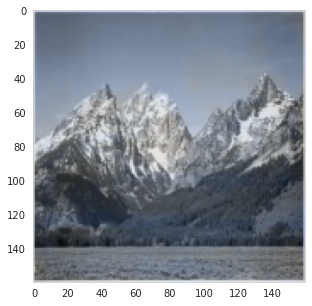

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/land2.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/land3.png'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

FileNotFoundError: ignored

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/bose1.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/bose2.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)

In [ ]:
from skimage.transform import resize
import os
# test_path = '/content/drive/MyDrive/landscape Images/gray data/gray/'
# test = os.listdir(test_path)
# for imgName in test:
color_me = []
img = img_to_array(load_img('/content/drive/MyDrive/landscape Images/bw test/che_guevara.jpg'))
img = resize(img ,(160,160))
color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

output = colorizer.predict(color_me)
output = output * 128

from skimage.io import imsave
# Output colorizations
for i in range(len(output)):
    result = np.zeros((160, 160, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    # imsave("result"+i+".png", lab2rgb(result))
    plt.figure(figsize=(5,5))
    plt.imshow(lab2rgb(result))
    plt.grid(False)